In [24]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})
from scipy import stats

In [349]:
#function to generate a random signal given number of break-points and number of data points
def generate_random_signal(break_points,no_of_data_points):
    size = int(no_of_data_points)/break_points
    temp = np.random.randint(1,100)
    df = pd.DataFrame({'values':[ temp+ float(i)/10 for i in list(np.random.randint(1, 100, size))]})
    for i in range(1,break_points,1):
        temp = np.random.randint(1,100)
        df = df.append(pd.DataFrame({'values':[temp + float(i)/10 for i in list(np.random.randint(1, 100, size))]}),ignore_index=True)
    return df
        

In [350]:
def cal_cost(y):
    n = len(y)
    V = np.full([n,n],np.inf)
    for j1 in range(n):
        for j2 in range(j1,n,1):
            yj = y[j1:j2]
            yj_mean = float(np.mean(yj))
            V[j1,j2] = np.sum((yj-yj_mean)**2)
    return V

In [351]:
def cal_tau(V,Kmax):
    U = np.zeros(Kmax)
    Nr = Kmax - 1
    n = len(y)
    U[0] = V[0,-1].copy()
    D = V[:,-1].copy()
    Pos = np.full([n,Nr],np.inf)
    Pos = Pos.astype(int)
    Pos[-1,:] = np.array([n]*Nr)
    tau_mat = np.full([Nr,Nr],np.inf)
    tau_mat = tau_mat.astype(int)
    for k in range(1,Nr+1,1):
        for j in range(n-1):
            dist = V[j,j:n-1] + D[j+1:n]
            D[j] = min(dist)
            Pos[j,0] = np.argmin(dist) + j
            if k > 1:
                Pos[j,1:k] = Pos[Pos[j,0],:(k-1)]
        U[k] = D[0]
        tau_mat[k-1,0:k+1] = Pos[0,0:k+1]
    return U,D,Pos,tau_mat

In [352]:
def plot_output(taus,df):
    means = []
    min_tau = min(taus)
    max_tau = max(taus)
    for i in range(len(taus)):
        if taus[i] == min_tau:
            temp = df.loc[:taus[i],'values'].mean()
            means.append(float(temp))
            df.loc[:taus[i],'mean'] = float(temp)
        elif taus[i] == max_tau:
            temp = df.loc[taus[i]:,'values'].mean()
            means.append(float(temp))
            df.loc[taus[i]:,'mean'] = float(temp)
            temp = df.loc[taus[i-1]:taus[i],'values'].mean()
            means.append(float(temp))
            df.loc[taus[i-1]+1:taus[i],'mean'] = float(temp)
        else:
            temp = df.loc[taus[i-1]:taus[i],'values'].mean()
            means.append(float(temp))
            df.loc[taus[i-1]+1:taus[i],'mean'] = float(temp)
    plot = sns.lineplot(x = 'time', y = 'mean',data = df.reset_index(),color = 'green')
    plot = sns.lineplot(x = 'time', y = 'values',data = df.reset_index())
    plot = sns.scatterplot(x = 'time', y = 'values',data = df.loc[taus.tolist(),:].reset_index(),color = 'black',s = 150)
    for i in taus:
        plot.axvline(i,0,12,color = 'red')

In [369]:
df = generate_random_signal(8,200)
df.index.name = 'time'
y = df.copy(deep = True)

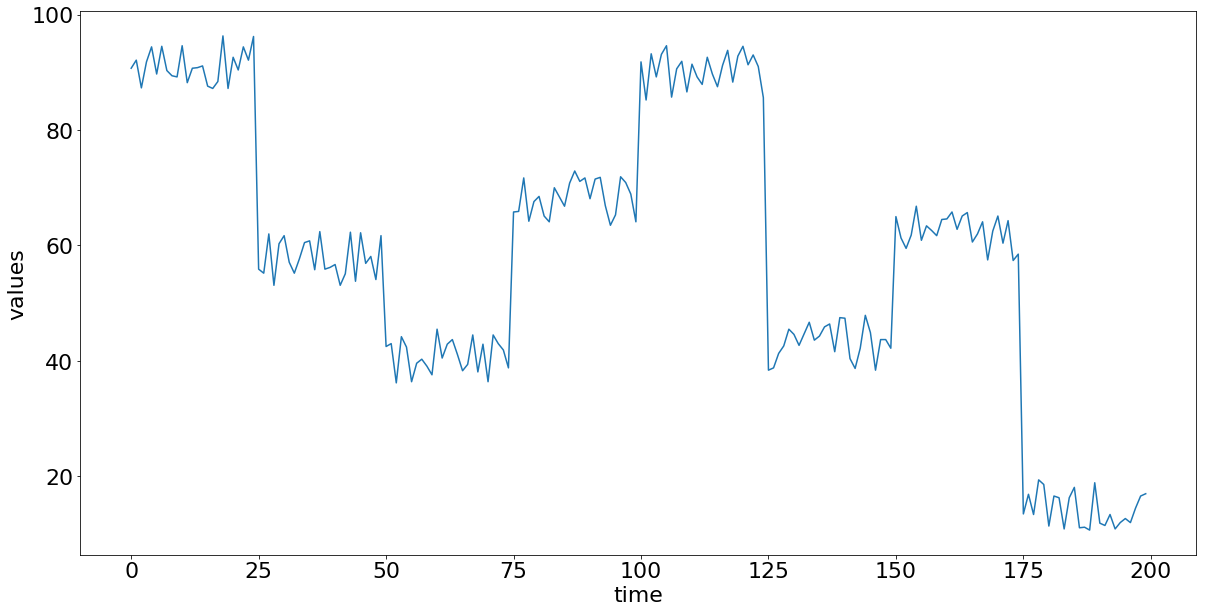

In [370]:
plot = sns.lineplot(x = 'time', y = 'values',data = df.reset_index())

In [371]:
Kmax = 9
V = cal_cost(y)

In [372]:
U,D,Pos,tau_mat = cal_tau(V,Kmax)

In [373]:
taus = tau_mat[-1,:]

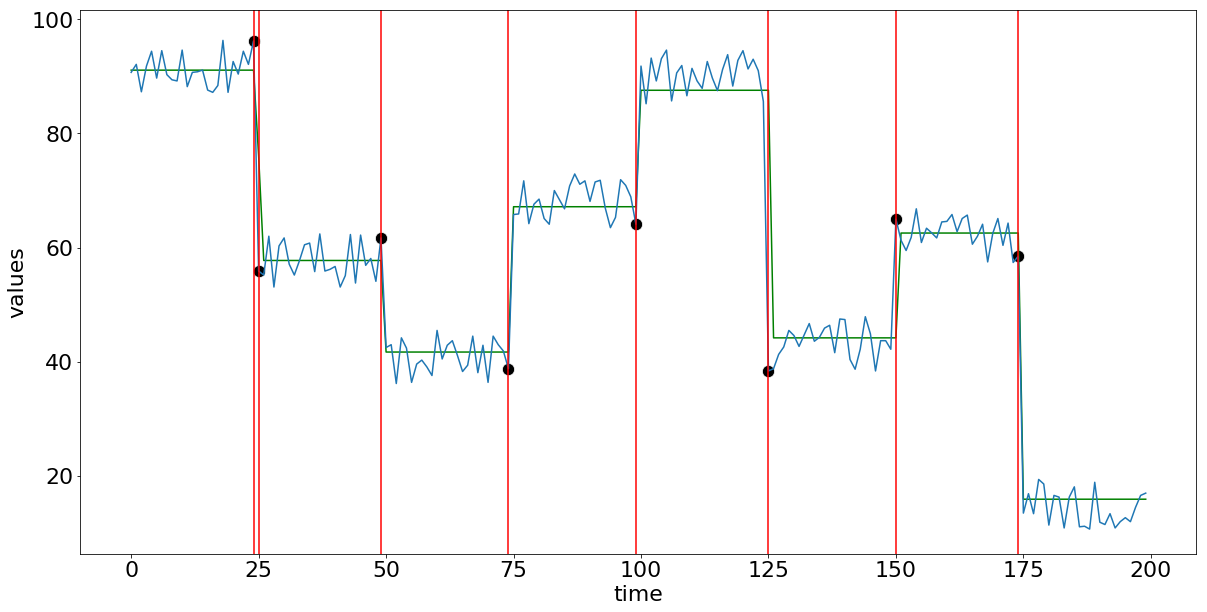

In [374]:
plot_output(taus,df)